In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from pyML.plot_decision_regions import plot_decision_regions
from pyML.pymldata import iris_data_for_training

# Decision Tree Models

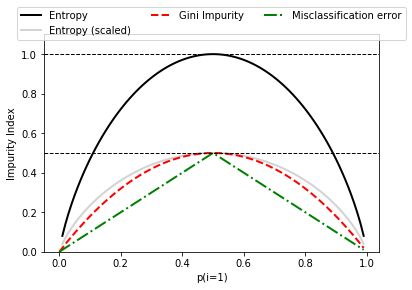

In [7]:
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1- p))
def error(p):
    return 1 - np.max([p, 1 - p])
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err], 
                         ['Entropy', 'Entropy (scaled)', 
                          'Gini Impurity', 'Misclassification error'],
                        ['-', '-', '--', '-.'],
                        ['black', 'lightgray',
                        'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), 
         ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

In [8]:
X_train, X_test, y_train, y_test, X_train_std, X_test_std, X_combined_std, y_combined = iris_data_for_training()

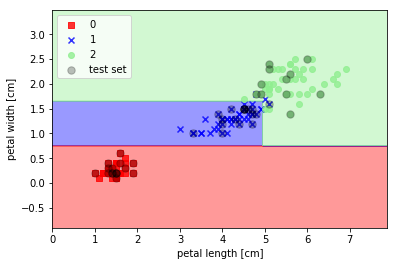

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',
                               max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                     classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [12]:
print X_combined

[[ 3.5  1. ]
 [ 5.5  1.8]
 [ 5.7  2.5]
 [ 5.   1.5]
 [ 5.8  1.8]
 [ 3.9  1.1]
 [ 6.1  2.3]
 [ 4.7  1.6]
 [ 3.8  1.1]
 [ 4.9  1.8]
 [ 5.1  1.5]
 [ 4.5  1.7]
 [ 5.   1.9]
 [ 4.7  1.4]
 [ 5.2  2. ]
 [ 4.5  1.6]
 [ 1.6  0.2]
 [ 5.1  1.9]
 [ 4.2  1.3]
 [ 3.6  1.3]
 [ 4.   1.3]
 [ 4.6  1.4]
 [ 6.   1.8]
 [ 1.5  0.2]
 [ 1.1  0.1]
 [ 5.3  1.9]
 [ 4.2  1.2]
 [ 1.7  0.2]
 [ 1.5  0.4]
 [ 4.9  1.5]
 [ 1.5  0.2]
 [ 5.1  1.8]
 [ 3.   1.1]
 [ 1.4  0.3]
 [ 4.5  1.5]
 [ 6.1  2.5]
 [ 4.2  1.3]
 [ 1.4  0.1]
 [ 5.9  2.1]
 [ 5.7  2.3]
 [ 5.8  2.2]
 [ 5.6  2.1]
 [ 1.6  0.2]
 [ 1.6  0.2]
 [ 5.1  2. ]
 [ 5.7  2.1]
 [ 1.3  0.3]
 [ 5.4  2.3]
 [ 1.4  0.2]
 [ 5.   2. ]
 [ 5.4  2.1]
 [ 1.3  0.2]
 [ 1.4  0.2]
 [ 5.8  1.6]
 [ 1.4  0.3]
 [ 1.3  0.2]
 [ 1.7  0.4]
 [ 4.   1.3]
 [ 5.9  2.3]
 [ 6.6  2.1]
 [ 1.4  0.2]
 [ 1.5  0.1]
 [ 1.4  0.2]
 [ 4.5  1.3]
 [ 4.4  1.4]
 [ 1.2  0.2]
 [ 1.7  0.5]
 [ 4.3  1.3]
 [ 1.5  0.4]
 [ 6.9  2.3]
 [ 3.3  1. ]
 [ 6.4  2. ]
 [ 4.4  1.4]
 [ 1.5  0.1]
 [ 4.8  1.8]
 [ 1.2  0.2]
 [ 6.7  2. ]

In [15]:
from sklearn.tree import export_graphviz
export_graphviz(tree,
                out_file='tree.dot',
               feature_names=['petal length', 'petal width'])

# Random Forests

Ensemble of decision trees

Steps:  
1) Random *bootstrap* of size n (randomly choose n samples from training set, with replacement) 

2) Grow a decision tree from the bootstrap sample. At each node:  
    1. Randomly select d features without replacement
    2. Split the node using best split based on objective function

3) Repeat the steps 1 to 2 k times  

4) Aggregate the prediction by each tree to assign the class label by majority vote

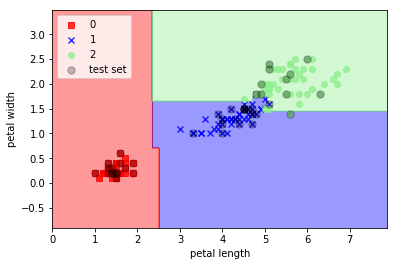

In [16]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',
                               n_estimators=10,
                               random_state=1,
                               n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, 
                     classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

# K-nearest neighbors -- lazy learning algorithm
1. Choose the number of *k* and a distance metric
2. Find the *k* nearest neighbors of the sample that we want to classify
3. Assign the class label by majority vote

Can be computationally expensive  


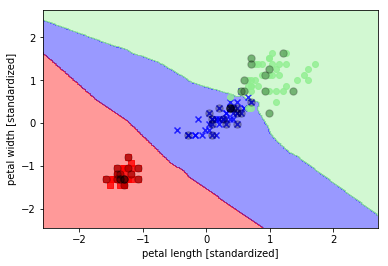

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2,
                          metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                     classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.show()